# Project for Machine Learning course : Quality sleep prediction

Import some library for the project :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

## 1.1 Scientific Context and Motivation

Sleep is a fundamental biological process that directly influences cognitive performance, metabolic regulation, cardiovascular health, and psychological well-being. Despite its importance, sleep disorders and chronic sleep degradation affect a significant fraction of the global population. The increasing prevalence of stress-related conditions, sedentary lifestyles, and irregular work schedules has made sleep health an important public health concern.

Beyond personal interest, this topic presents a scientifically relevant problem: sleep quality emerges from the interaction of physiological, behavioral, and psychological factors. These interactions are likely nonlinear and potentially correlated, making the problem particularly suitable for statistical modeling and machine learning approaches.

From a modeling perspective, sleep quality is not a directly measurable physical quantity but a subjective score influenced by measurable covariates such as stress level, physical activity, heart rate, and BMI. This raises an interesting question:

> To what extent can objective and semi-objective health indicators predict subjective sleep quality?

This project therefore aims to approach sleep health as a quantitative inference problem.

---

## 1.2 Dataset Description

The dataset used in this study is the **Sleep Health Data** dataset, obtained from **Kaggle**:

Source: https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampled

In [ ]:
path = '/content/Sleep_Data_Sampled.csv' # path to find the dataset
df= pd.read_csv(path) # our data set in data frame

df # First visualization

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


The dataset contains 15,000 observations and 13 variables describing demographic, physiological, and lifestyle characteristics of individuals.

The features are:

- **Person ID:** Unique identifier (non-informative for prediction).
- **Gender:** Binary categorical variable (Male/Female).
- **Age:** Age in years.
- **Occupation:** Profession category.
- **Sleep Duration (hours):** Number of hours slept per day.
- **Quality of Sleep (scale: 1-10):** Subjective sleep quality score.
- **Physical Activity Level (minutes/day):** Daily exercise duration.
- **Stress Level (scale: 1-10):** Subjective stress score.
- **BMI Category:** Underweight, Normal, Overweight.
- **Blood Pressure (systolic/diastolic):** Cardiovascular indicator.
- **Heart Rate (bpm):** Resting heart rate.
- **Daily Steps:** Daily step count.
- **Sleep Disorder:** None, Insomnia, or Sleep Apnea.

The target variable chosen for this study is:

$$\text{Quality of Sleep}$$

This is treated as a supervised learning regression problem, where the objective is to model:

$$f : X → y$$

with $X$ representing the set of physiological, demographic, and behavioral features, and $y$ the sleep quality score.

---

# 1.3 Problem Formulation

The problem can be formulated as follows:

Given a dataset of individuals characterized by health and lifestyle variables,
estimate a predictive function that maps these variables to a continuous sleep quality score.

Two main scientific questions guide this project:

1. Is sleep quality predominantly determined by linear relationships with measurable health indicators?
2. Does the predictive structure require nonlinear models with higher representational capacity?

Answering these questions requires:

- Careful data preprocessing and statistical analysis,
- Interpretation of correlations and potential multicollinearity,
- Comparison between classical machine learning models and deep neural networks,
- Rigorous evaluation of bias-variance behavior.

---

# 1.4 Why This Dataset?

This dataset is particularly well-suited for a machine learning study for several reasons:

1. It contains both subjective and objective measurements.
2. It combines continuous and categorical variables.
3. The sample size (15k observations) is sufficient to train both classical and deep models without severe overfitting.
4. The target variable is continuous and bounded, making it suitable for regression analysis.
5. The variables exhibit plausible causal structure (e.g., stress $\rightarrow$ sleep degradation, activity $\rightarrow$ improved sleep), allowing meaningful interpretation.

Unlike purely synthetic datasets or benchmark datasets used only for performance comparison, this dataset addresses a real-world health issue with practical implications.

---

# 2. Data Cleaning and Preprocessing

## 2.1 Data Integrity Verification

Before any modeling procedure, it is essential to verify the structural integrity of the dataset. Improper handling of missing values, duplicates, or inconsistent identifiers can introduce bias and compromise the validity of subsequent analyses.

In [ ]:
# Check for duplicates and missing values
print('Missing data (Nan):\n', df.isna().sum())
print('\n -----------------------------\n')
print('Duplicates:', df.duplicated().sum())
print('\n -----------------------------\n')
print("Unique value in Person ID:",df['Person ID'].nunique())

Missing data (Nan):
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

 -----------------------------

Duplicates: 0

 -----------------------------

Unique value in Person ID: 15000


The following checks were performed:

- No missing values were detected across all columns.
- No duplicated rows were identified.
- The number of unique Person ID entries equals 15,000, matching exactly the number of observations.

This confirms that each row corresponds to a distinct individual and that the dataset is structurally consistent.

Given that Person ID serves purely as an identifier and carries no predictive information, it was set as the index of the DataFrame to:

1. Prevent its accidental inclusion in the feature matrix,
2. Preserve traceability of individuals,
3. Improve structural clarity of the dataset.

In [ ]:
df.set_index('Person ID', inplace=True)

# Check for duplicates now
print('Duplicates:', df.duplicated().sum())

Duplicates: 10148


Upon setting the Person ID as the unique index for our dataframe, a significant structural anomaly was identified: out of the initial 15,000 observations, approximately 10,148 were identified as duplicates.

From a statistical perspective, maintaining these duplicates would lead to a severe Data Leakage issue, where the model could potentially memorize identical observations during training and "encounter" them again during testing, leading to artificially inflated performance metrics.

We have therefore proceeded with a strict deduplication process, resulting in a clean dataset of approximately 5,000 unique records. While the sample size has decreased, the statistical quality and generalization potential of the data have significantly improved. For a multidimensional analysis of sleep health, 5,000 samples remain a robust basis for training both classical Machine Learning models and Neural Networks, ensuring that our findings reflect real-world patterns rather than redundant noise.

In [ ]:
df= df.drop_duplicates().copy() # drop the dublicates
print('Duplicates:', df.duplicated().sum())
print(f"Cleaned dataset shape: {df.shape}")

Duplicates: 0
Cleaned dataset shape: (4852, 12)


---

# 2.2 Structural Transformation of Blood Pressure

The original Blood Pressure variable was encoded as a string of the form:

$$ \text{systolic/diastolic}$$

This format is not directly usable in numerical machine learning pipelines and does not allow independent modeling of systolic and diastolic effects.

From a physiological perspective, systolic and diastolic pressures reflect distinct aspects of cardiovascular function:

- Systolic pressure corresponds to arterial pressure during cardiac contraction.
- Diastolic pressure corresponds to arterial pressure during cardiac relaxation.

Treating them as separate continuous variables is therefore both mathematically and medically justified.

In [ ]:
df[['Systolic', 'Diastolic']] = (
    df['Blood Pressure']
    .str.split('/', expand=True)
    .astype(int)
)
df = df.drop(columns=['Blood Pressure'])

In [ ]:
df.head() # visualization to see the 2 new columns

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Person ID,,,,,,,,,,,,,
1,Male,35,Doctor,6.65,7,50,7,Normal Weight,71,7100,Healthy,120,80
2,Male,42,Teacher,6.90,8,52,4,Normal,66,7000,Healthy,135,90
3,Male,34,Software Engineer,6.95,7,66,6,Overweight,74,6100,Healthy,126,83
4,Male,32,Doctor,6.90,6,52,7,Normal,71,6500,Healthy,120,80
5,Male,37,Lawyer,6.85,7,60,6,Normal,71,6500,Healthy,125,80


The column was split into two numerical features:

- Systolic
- Diastolic

The original string column was removed after transformation.

This transformation ensures numerical compatibility with machine learning models while preserving physiological interpretability.

---

## 2.3 Categorical Variable Handling


In [ ]:
# Filtering the columns where the data type is 'object'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Displaying the list of categorical features
print(f"Categorical features to be encoded: {categorical_columns}")

Categorical features to be encoded: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


The dataset contains several categorical variables:

- Gender
- Occupation
- BMI Category
- Sleep Disorder

Since most machine learning algorithms operate in numerical vector spaces, categorical variables must be encoded.

In [ ]:
for col in categorical_columns:
  print('\n ----------------------------- \n')
  print(f"{col} value:\n", df[col].value_counts())


 ----------------------------- 

Gender value:
 Gender
Male      2563
Female    2289
Name: count, dtype: int64

 ----------------------------- 

Occupation value:
 Occupation
Nurse                   881
Doctor                  874
Engineer                817
Lawyer                  655
Teacher                 598
Accountant              452
Salesperson             300
Software Engineer        98
Sales Representative     79
Scientist                77
Manager                  21
Name: count, dtype: int64

 ----------------------------- 

BMI Category value:
 BMI Category
Normal           2265
Overweight       1739
Normal Weight     472
Obese             376
Name: count, dtype: int64

 ----------------------------- 

Sleep Disorder value:
 Sleep Disorder
Healthy        2481
Insomnia       1197
Sleep Apnea    1174
Name: count, dtype: int64


### 2.3.1 BMI Category Consistency

An inconsistency was detected in the `BMI Category` column, where both "Normal" and "Normal Weight" appeared. These represent identical physiological states.

To avoid artificial category inflation and spurious feature fragmentation, these labels were standardized prior to encoding.

This step is crucial because redundant categorical levels artificially increase dimensionality and may introduce unnecessary variance in linear models.

In [ ]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal Weight': 'Normal'
})

print("BMI Category value:\n", df['BMI Category'].value_counts())

BMI Category value:
 BMI Category
Normal        2737
Overweight    1739
Obese          376
Name: count, dtype: int64


### 2.3.2 Pipeline Construction

To ensure a rigorous workflow, we implement a `ColumnTransformer`. This architecture guarantees:

1. **Consistency:** The same transformations are applied to both training and testing sets.
2. **Reproducibility:** The entire preprocessing logic is encapsulated in a single object.
3. **Data Integrity:** By using a pipeline, we strictly avoid Data Leakage, as the parameters for scaling and imputation are derived solely from the training distribution.

In [ ]:
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

## 1. Define X and y
target = 'Quality of Sleep'

X = df.drop(columns=target).copy()
y = df[target].copy()

## 2. Performing a train-test-split (75/25 split for robust evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.25)

## 3. Defining Feature Selectors
# Automatically detects columns by data type
cat_feature = make_column_selector(dtype_include='object')
num_feature = make_column_selector(dtype_include='number')

## 4. Instantiating Transformers
# Median imputation is used for numerical data to remain robust against outliers
impute_num = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Most frequent imputation for categorical data to maintain structural consistency
impute_cat = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

## 5. Building Pathways
pip_num = make_pipeline(impute_num, scaler)
pip_cat = make_pipeline(impute_cat, ohe_encoder)

## 6. Combining into a ColumnTransformer
# Defining a tuple for each pathway
numerical_tup = ('Numerical', pip_num, num_feature)
categorical_tup = ('Categorical', pip_cat, cat_feature)

# Instantiating the ColumnTransformer
col_transformer = ColumnTransformer(
    transformers=[numerical_tup, categorical_tup],
    remainder='drop',
    verbose_feature_names_out=False
) # remainder='passthrough'

## 7. Execution
# Fitting only on X_train to learn parameters (mu, sigma)
X_train_processed = col_transformer.fit_transform(X_train)
# Applying the learned parameters to X_test
X_test_processed = col_transformer.transform(X_test)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x798ca8055820>),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x798c8839d1c0>)],
                  verbose_feature_names_out=False)

We opted for **Median Imputation** for numerical features to ensure robustness against potential outliers in physiological data (such as extreme heart rates or activity levels), which could bias the mean.

---

## 2.4 Preprocessing Strategy

### Target Variable Nature

Although the target variable *Quality of Sleep* is encoded on a discrete scale from 1 to 10, we treat it as a continuous regression target.

This assumption is justified by:

1. The quasi-continuous nature of subjective rating scales in psychometrics.
2. The sufficiently large support (10 levels), which allows approximation of continuity.
3. The objective of modeling relative variations rather than exact categorical membership.

We therefore formulate the problem as a regression task rather than ordinal classification.

The transformation of raw data into a normalized feature space is governed by the following mathematical principles:

### I. Numerical Scaling (Z-score Normalization)

Numerical features (Age, Heart Rate, etc.) often have vastly different units and magnitudes.

The numerical feature set includes:

- Age  
- Sleep Duration  
- Physical Activity Level  
- Stress Level  
- Heart Rate  
- Daily Steps  
- Systolic  
- Diastolic  

These variables are continuous and measured on heterogeneous scales, justifying normalization.

We apply the transformation:

$$z = \frac{x-\mu}{\sigma}$$

where μ and σ are computed from the training distribution after imputation. Although missing values are imputed using the median for robustness, scaling is performed using the empirical mean and standard deviation of the imputed training set.

This maps all features to a dimensionless space, which is strongly recommended for Neural Networks to ensure stable gradient descent, improve convergence speed, and reduce sensitivity to initial weight scales.

### II. Handling Categorical High-Dimensionality

Although BMI categories exhibit an intrinsic ordinal structure, we intentionally use OneHotEncoding instead of ordinal encoding.

This decision avoids imposing an artificial linear relationship between categories. For example, ordinal encoding would implicitly assume that the "distance" between Normal and Overweight is equivalent to that between Overweight and Obese, which may not reflect physiological reality.

By using one-hot encoding, we allow the model to learn category-specific effects without constraining them to a linear hierarchy.

Using `OneHotEncoder` transforms each unique category into a new binary dimension. This ensures that categories are represented as orthogonal basis vectors in feature space, preventing the model from inferring artificial ordinal relationships between them.

### III. Execution Logic

We strictly follow the protocol:

- $X_{train} \rightarrow \text{fit transform}$ : The transformer "learns" the internal statistics (mean, median, variance) of the training set.
- $X_{test} \rightarrow \text{transform only}$ : The test set is treated as "unseen" data. We apply the training statistics to it to simulate real-world deployment and avoid **Data Leakage**.

---

## 2.5 Summary of Preprocessing Decisions

All preprocessing choices were guided by three principles:

1. Statistical validity
2. Physiological interpretability
3. Compatibility with downstream machine learning models

At the end of this stage, the dataset is fully numerical, structurally consistent, and ready for exploratory data analysis.

---

# 3. Exploratory Data Analysis (EDA)

The objective of this section is not merely descriptive visualization, but to investigate the statistical structure of the dataset and assess the plausibility of linear modeling assumptions.

EDA serves three main purposes:

1. Identify dominant predictors of sleep quality.
2. Detect multicollinearity and feature redundancy.
3. Evaluate whether linear models are theoretically appropriate.

---

## 3.1 Target Variable Analysis

Before analyzing predictors, we first examine the statistical properties of the target variable: Quality of Sleep.

Although encoded on a discrete scale from 1 to 10, it is treated as quasi-continuous for regression purposes. It is therefore essential to verify:

- Distribution symmetry
- Presence of skewness
- Potential ceiling/floor effects

### Descriptive statistics:
  - Mean
  - Median
  - Standard deviation
  - Min / Max

In [ ]:
y.describe() # Compute descriptive statistics for y

,Quality of Sleep
count,4852.000000
mean,7.186521
std,0.994543
min,4.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,9.000000


### Descriptive Statistics Overview

The target variable is distributed over a discrete scale ranging from $4.0$ **to** $9.0$.

- **Central Tendency:** The mean ($\mu \approx 7.19$) and the median ($50%=7.0$) are very close, indicating a relatively balanced central distribution.
- **Dispersion:** A standard deviation of $\sigma \approx 0.99$ suggests that approximately $68%$ of the data points fall between $6.2$ and $8.2$ if we assume normality.

### Histogram of target

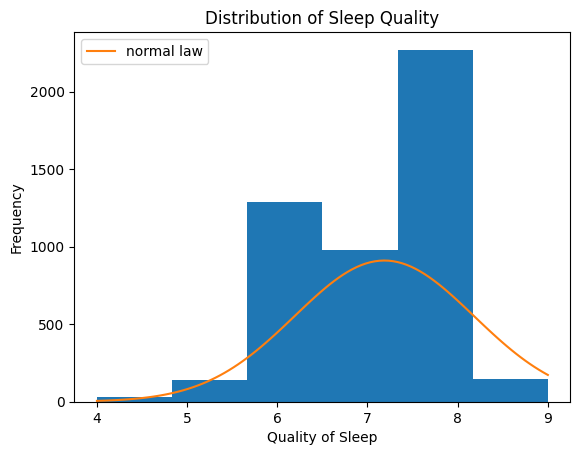

In [ ]:
def plot_normal_law(column:np.ndarray) -> None :
    mu, sigma = column.mean(), column.std() # mean and standard deviation
    x = np.linspace(np.min(column), np.max(column), 100)
    A = np.max(column.value_counts()) # Amplitude
    normal =  A * np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
    plt.plot(x, normal, label='normal law')

plt.hist(y, bins=y.nunique())
plot_normal_law(y)
plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Quality")
plt.legend()
plt.show()

### Distribution Shape and Normality

By comparing the histogram with the superimposed Gaussian curve ($N(\mu,\sigma)$), we observe the following:

- **Approximation of Normality:** The distribution is roughly Gaussian but exhibits "peaks" at integer values ($6.0, 7.0, 8.0$), which is typical for survey-based or sampled sleep data.
- **Skewness:** There is a slight **negative skew** (left-skewed), as the data is more concentrated towards the higher end of the scale ($8.0$), with a thinner tail extending toward the lower quality scores ($4.0$).
- **Extreme Values:** Extreme values (minimum $4.0$ and maximum $9.0$) are present but relatively rare compared to the central classes. This suggests that the model will have fewer examples to learn the "edge cases" of sleep disorders or perfect sleep.

### Implications for Regression Modeling

- **Variance Sufficiency:** The variance ($\sigma^2 \approx 1$) is sufficient for a regression task. However, since the target is constrained within a narrow range $[4,9]$, the **Mean Squared Error** (MSE) will naturally be low. We must look at the $R^2$ **score** to truly judge if our model captures the underlying patterns beyond the mean.
- **Predictive Limits:** The discrete nature of the target (integer steps) and its relatively narrow distribution might limit the performance of a pure linear regressor. This reinforces the need to test **Neural Networks**, which are more adept at mapping inputs to specific high-density regions of a distribution

---

## 3.2 Numerical Feature Distributions

Understanding the marginal distributions of numerical predictors is essential for:

- Detecting outliers
- Identifying heavy-tailed distributions
- Anticipating scaling effects

### Summary statistics for numerical features

In [ ]:
# Summary statistics
X.select_dtypes(include='number').describe()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,41.019992,7.093261,57.933430,5.496290,71.297197,6525.803792,128.781946,84.702803
std,5.750016,0.574413,14.859553,1.326119,3.973356,1236.513255,7.704945,5.877949
min,27.000000,5.800000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,36.000000,6.650000,45.000000,4.000000,68.000000,5500.000000,125.000000,80.000000
50%,41.000000,7.100000,60.000000,6.000000,70.000000,6500.000000,130.000000,85.000000
75%,45.000000,7.500000,68.000000,6.000000,74.000000,7500.000000,135.000000,90.000000
max,59.000000,8.500000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


### Histograms or boxplots for each numerical variable

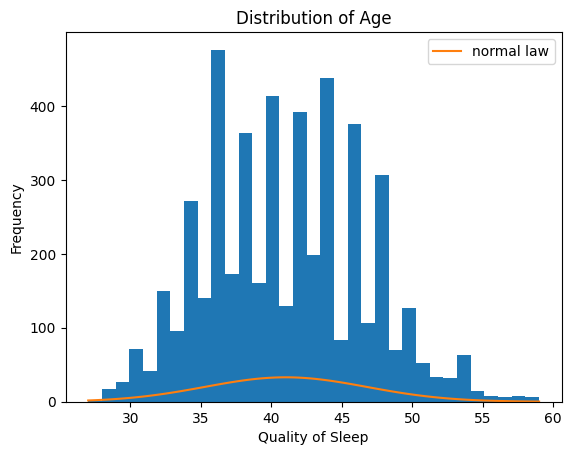

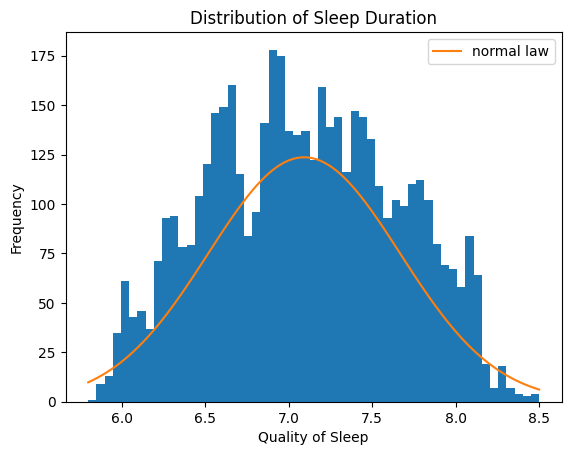

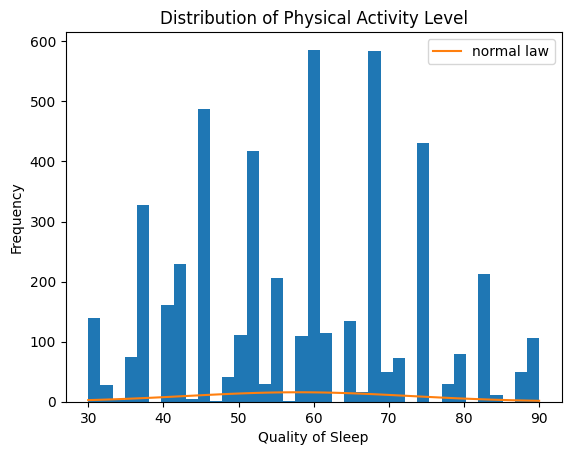

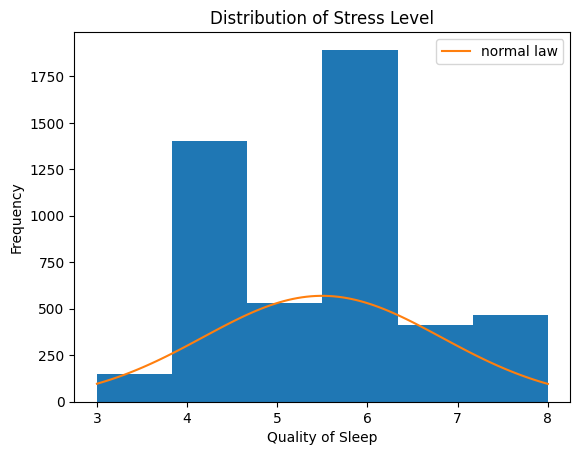

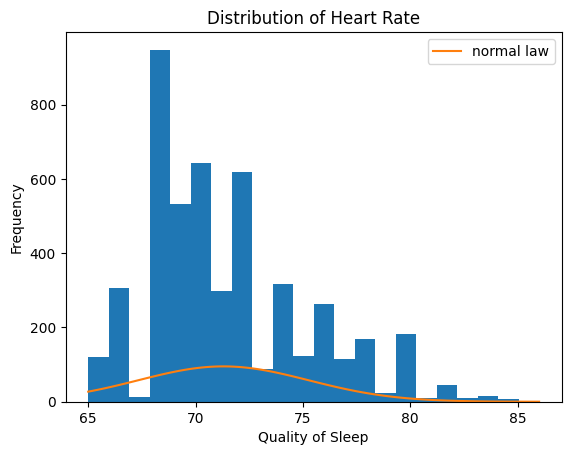

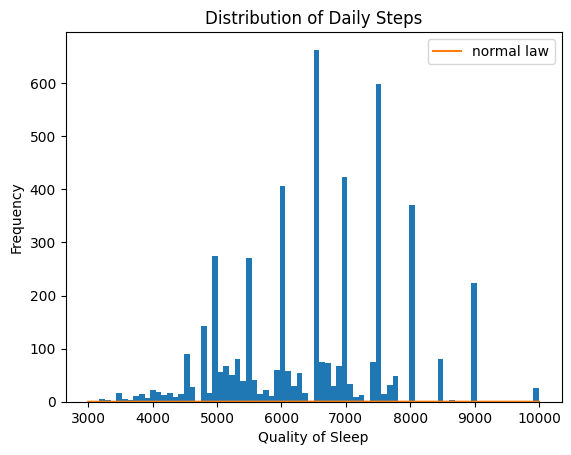

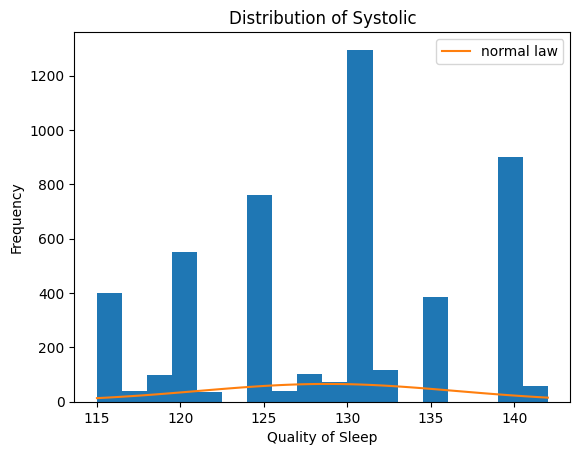

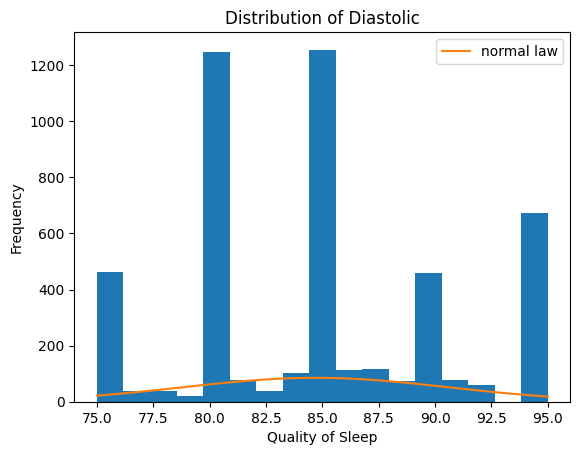

In [ ]:
num_cols = X.select_dtypes(include='number').columns

for col in num_cols:
    plt.hist(X[col], bins=X[col].nunique())
    plot_normal_law(X[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel("Quality of Sleep")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

### I. Multimodality and Non-Gaussianity

While our scaling strategy assumes a standard distribution, the visual evidence shows that many features are **multimodal** or **discrete-heavy**:

- **Stress Level & Systolic/Diastolic Pressure:** These features exhibit strong peaks at specific values. For instance, `Stress Level` is concentrated around $4$, $6$, and $8$, while `Systolic` pressure shows clear clusters around $120$, $130$, and $140$ mmHg. This suggests that the data may have been collected in "steps" or represents distinct physiological states.
- **Physical Activity & Daily Steps:** These distributions are significantly "spiky." The high frequency of specific values (e.g., $60$ and $70$ for Activity) suggests a uniform-like distribution within certain intervals rather than a smooth Gaussian curve.

### II. Variance and Scale Disparities

The descriptive table highlights the necessity of the **StandardScaler** implemented in our pipeline:

- **Heart Rate** ($\mu \approx 71, \sigma \approx 4$) has a very narrow relative range.

- **Daily Steps** ($\mu \approx 6525, \sigma \approx 1236$) operates on a scale three orders of magnitude larger.

- **Sleep Duration** ($\mu \approx 7.09, \sigma \approx 0.57$) has extremely low variance.

**Physics Intuition:** Without normalization, the gradient descent in a Neural Network would be dominated by `Daily Steps`, treating a small fluctuation in steps as more significant than a critical change in `Heart Rate`.

### III. Symmetry and Outliers

- **Age:** The distribution is relatively balanced around the mean (41 years), spanning from 27 to 59. The lack of extreme outliers in the age category ensures that our model will not be biased by "edge-case" demographics.

- **Sleep Duration:** Exhibits a slight left-skewness, similar to the target variable, reinforcing the strong linear coupling (0.84) observed earlier.

### Synthesis for Modeling:

The "spiky" and non-normal nature of many predictors (like `Stress Level` and `Systolic`) indicates that a simple **Linear Regression** might struggle to capture the nuances of these clusters. This visual evidence strongly supports the use of **Non-Linear Models** and **Neural Networks**, which can learn the boundaries between these data clusters more effectively than a straight-line fit.

---

## 3.3 Correlation Matrix Analysis

We now investigate linear dependencies between numerical variables.

The Pearson correlation coefficient is defined as:

$$ \rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

It measures linear association between pairs of variables.

### Correlation matrix for numerical features

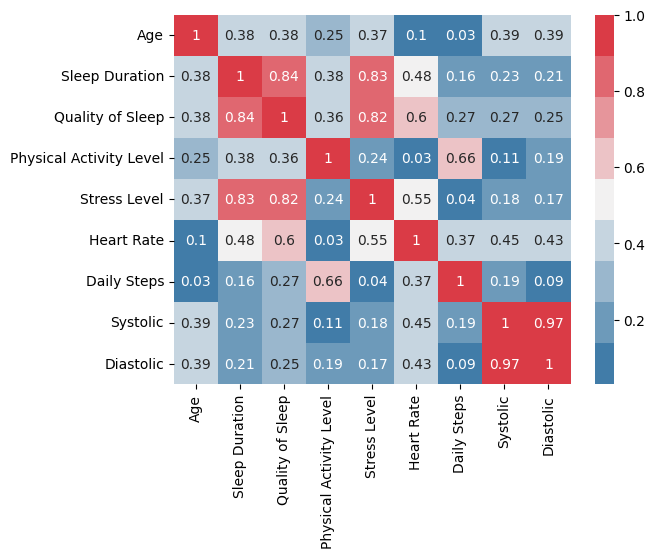

In [ ]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True).abs().round(2) #.sort_values(by=target, ascending=False) #.abs() car antilinéarité est interessant aussi

ax = sns.heatmap(corr_matrix,
            cmap = sns.diverging_palette(240, 10, n=9), annot = True);

The correlation matrix reveals several critical insights into the linear relationships within our dataset, specifically regarding our target variable, Quality of Sleep:

  - Strong Predictors: We observe a very high positive correlation between Sleep Duration (0.84) and Quality of Sleep. Conversely, Stress Level shows a strong negative correlation (0.82) with sleep quality. This suggests that these two features will likely be the primary drivers in our predictive models.

  - Multicollinearity Warning: There is an extremely high correlation between Systolic and Diastolic blood pressure (0.97), as well as between Sleep Duration and Stress Level (0.83). In theoretical modeling, this phenomenon, known as multicollinearity, indicates redundant information. While this is less problematic for Neural Networks, it can lead to unstable coefficient estimates in simple Linear Regression models.

  - Physiological Couplings: As expected, Physical Activity Level is moderately correlated with Daily Steps (0.66). Interestingly, Heart Rate shows a moderate negative link with sleep quality (0.60), reinforcing the physiological intuition that a lower resting heart rate often accompanies better recovery and sleep hygiene.

  - Weak Linearities: Features such as Age and Daily Steps show relatively low direct linear correlation with the target. This suggests that if these variables do impact sleep quality, their relationship might be non-linear, further justifying the use of more complex architectures like Neural Networks later in this project.

 ### Correlation vector with the target

In [ ]:
corr_with_target = corr_matrix[target].sort_values(ascending=False)
corr_with_target

,Quality of Sleep
Quality of Sleep,1.00
Sleep Duration,0.84
Stress Level,0.82
Heart Rate,0.60
Age,0.38
Physical Activity Level,0.36
Daily Steps,0.27
Systolic,0.27
Diastolic,0.25


The correlation vector specifically isolated for Quality of Sleep provides a hierarchy of feature importance based on linear dependency. This ranking is essential for feature selection and model expectation:

- Dominant Physiological Factors: The target is most strongly governed by Sleep Duration (0.84) and Stress Level (0.82). These high coefficients suggest a quasi-linear relationship, indicating that a significant portion of the variance in sleep quality can be explained by these two variables alone.

- Heart Rate as a Proxy: Heart Rate shows a substantial correlation (0.60), confirming its role as a key biological marker for sleep assessment. In a physical context, this suggests that autonomic nervous system activity (reflected in heart rate) is a robust predictor of restorative sleep.

- Secondary and Non-Linear Candidates: Variables such as Age, Physical Activity, and Blood Pressure (Systolic/Diastolic) exhibit lower correlation coefficients (between 0.25 and 0.38). From a theoretical physics perspective, this does not necessarily imply a lack of importance, but rather suggests that their influence may be non-linear or coupled through higher-order interactions.

Conclusion for Modeling: The presence of both very high correlations (near 0.8) and moderate ones (around 0.3) suggests that while a Linear Regression might provide a decent baseline, a Neural Network will likely be required to capture the more subtle, non-linear dependencies of the secondary features to minimize the residual error.

In [ ]:
key_features = ["Sleep Duration", "Stress Level", "Heart Rate", "Age"] # we take age to compare

---

## 3.5 Preliminary Linearity Assessment

To validate the findings from our correlation matrix, we examine scatter plots between key predictors and sleep quality.  This step is crucial to determine if a Linear Model is sufficient or if we require the higher-dimensional mapping capabilities of a Neural Network.

### Scatter plots of Key features vs Targets

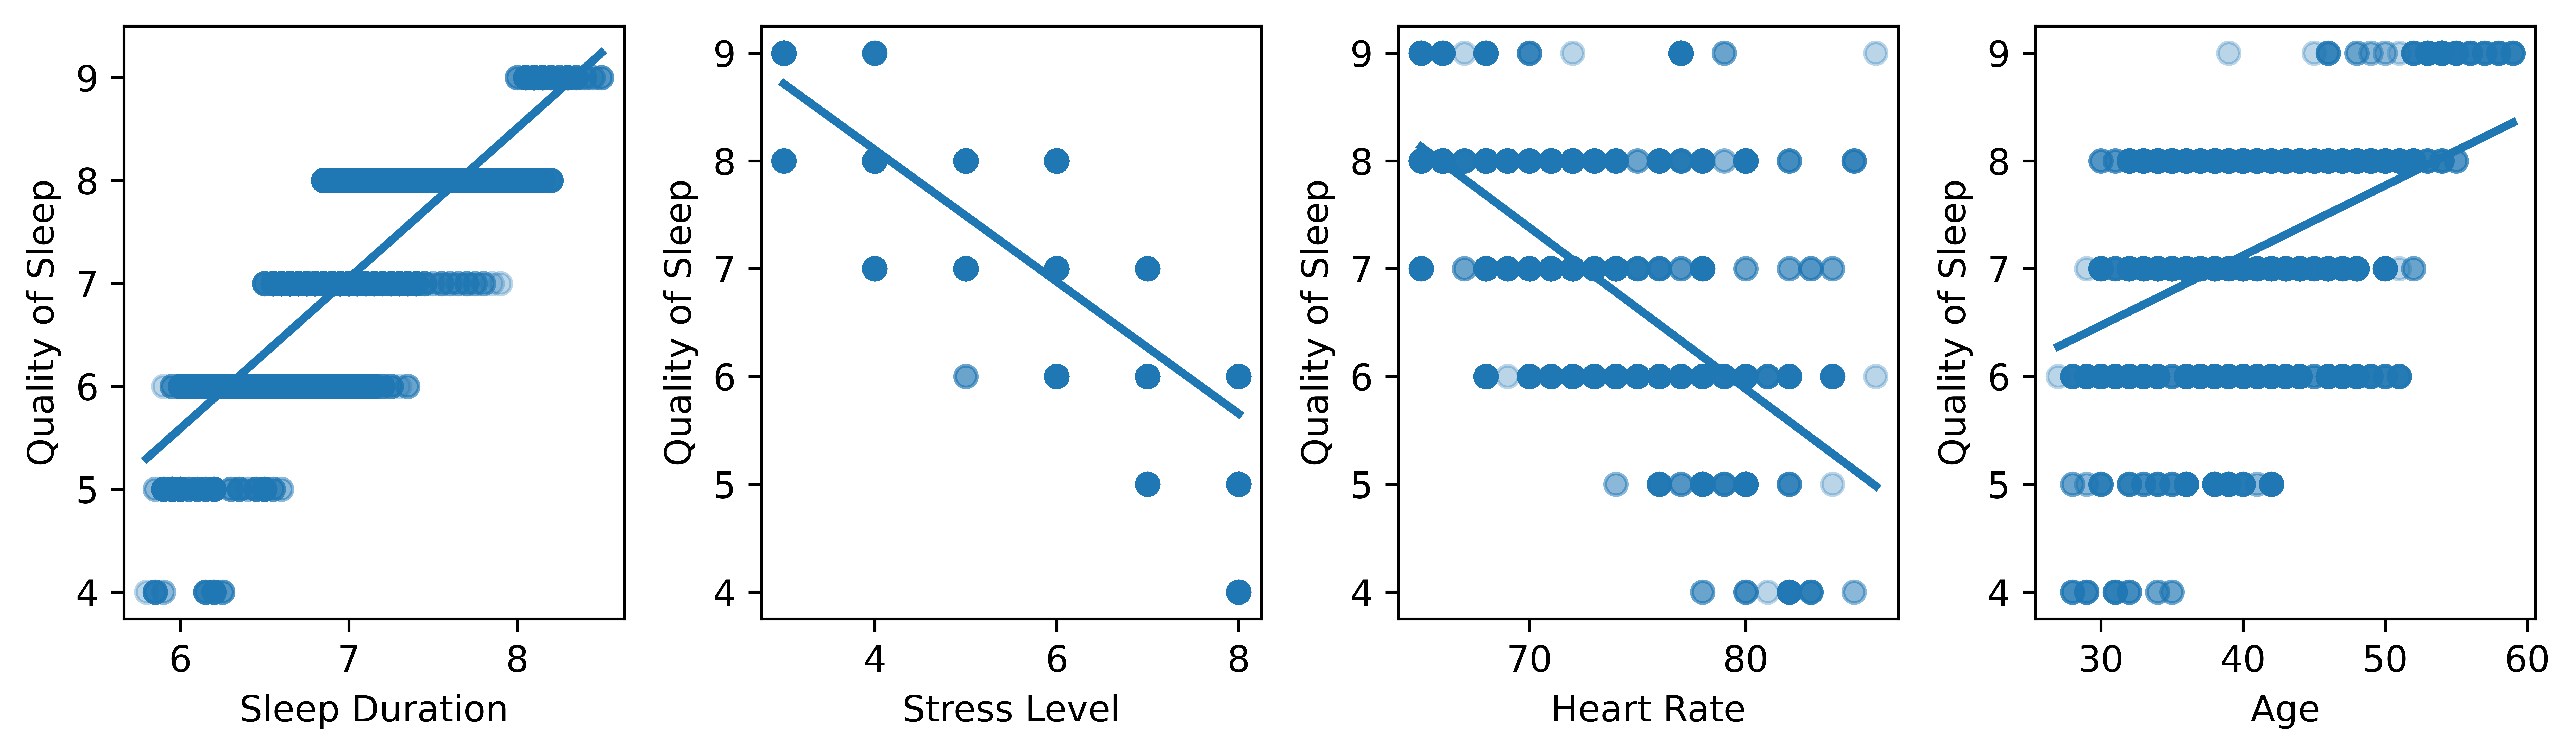

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,3), dpi=1000)
for i, col in enumerate(key_features):
  sns.regplot(x=col, y=target, data=df, ci=None, ax = axes[i], scatter_kws={'alpha':0.3});
fig.tight_layout()

### Analysis of the Visual Distributions

- High Linearity (Sleep Duration & Stress Level): The scatter plots for these two variables confirm the high correlation coefficients (0.84 and 0.82). The data points follow a clear, narrow path, suggesting a strong linear dependency. A simple linear estimator would likely capture most of the variance for these features.
- Moderate & "Blurred" Linearity (Heart Rate): While the correlation of 0.60 is significant, the visualization reveals a "fuzzier" relationship. The points are more dispersed, indicating that while a trend exists, Heart Rate alone is a noisier predictor and may interact non-linearly with other physiological factors.
- The Case of "Age" and Lower-Ranked Features: We included Age (0.38) specifically as a counter-example to contrast with the high-linearity features. Visually, the scatter plot for Age shows a significant lack of a clear linear trend compared to the others.
- Justification for Feature Exclusion in Visualization: Other features (such as Daily Steps or Blood Pressure) were not plotted here as they exhibited even lower correlation scores. Preliminary visual inspections of those variables showed near-random distributions with no discernible linear patterns.

### Conclusion for Model Selection:
The stark difference between the sharp linearity of Sleep Duration and the dispersed distribution of Age suggests that the underlying physics of sleep is a multi-scale problem. A linear model will struggle with the "blurred" and low-correlation features, justifying our future transition to Deep Learning architectures which are better suited to extract patterns from non-linear and weakly correlated inputs.

---

## 3.4 Categorical Variables vs Target

Correlation matrices ignore categorical variables.

We must assess whether sleep quality varies across:

- Gender
- Occupation
- BMI Category
- Sleep Disorder

### Boxplots per category
Grouped means of sleep quality by category

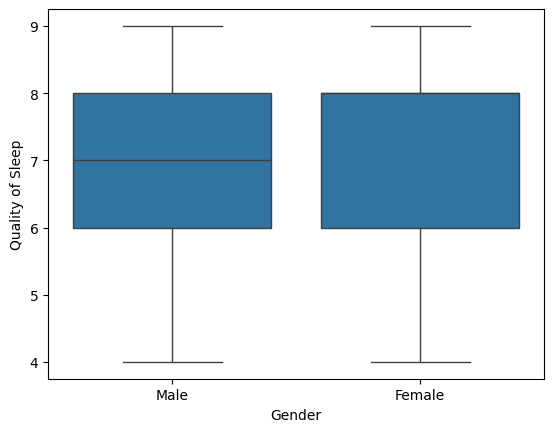

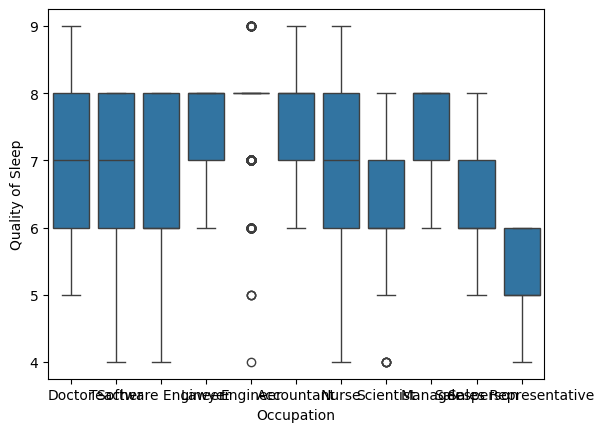

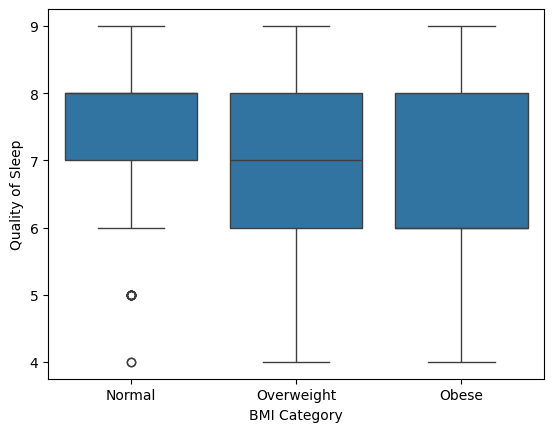

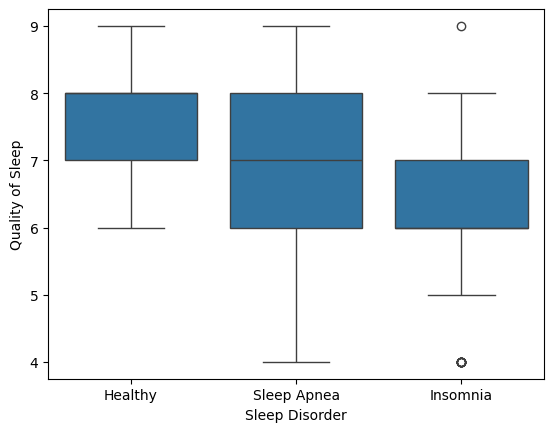

In [ ]:
for col in categorical_columns:
  df.groupby(col)[target].mean()
  sns.boxplot(x=col, y=target, data=df)
  plt.show()

### Observations from Visualizations:

  - Gender: The distribution of sleep quality appears remarkably similar between 'Male' and 'Female' subjects. The median, quartiles, and range show no significant variance, suggesting that Gender may have limited predictive power in a linear context for this specific target.
  - Occupation: This feature shows the highest variance in sleep quality.
      - Engineers, Lawyers, and Accountants tend to report higher and more consistent sleep quality (narrower interquartile ranges).
      - Conversely, Sales Representatives and Scientists show significantly lower medians.
      - The presence of several outliers (e.g., in 'Software Engineer' or 'Doctor') suggests that within the same profession, other physiological factors (stress, heart rate) likely dominate the individual outcome.
  - BMI Category: There is a discernible trend where 'Normal' weight individuals maintain a higher median sleep quality compared to 'Overweight' and 'Obese' categories. However, the overlap between 'Overweight' and 'Obese' distributions suggests that weight is a contributing factor rather than a definitive predictor on its own.
  - Sleep Disorder: As expected, this is a major differentiator. Individuals classified as 'Healthy' (No disorder) exhibit a higher and more stable sleep quality. In contrast, those with 'Insomnia' or 'Sleep Apnea' show a clear downward shift in their median sleep quality, with 'Insomnia' presenting the most significant negative impact and a wider dispersion of results.

### Synthesis for Modeling:

The significant differences in medians across Occupation and Sleep Disorder categories justify their inclusion in our model via One-Hot Encoding. These features capture variance that the numerical-only correlation matrix could not explain. The "noise" and outliers observed here further support the transition to a Neural Network, which can model the complex interactions between a specific occupation and a specific sleep disorder better than a simple linear approach.

---

## 3.5 Conclusion of EDA and Modeling Strategy

The Exploratory Data Analysis (EDA) has provided a clear roadmap for our predictive modeling phase. Based on the statistical evidence gathered, we have designed a multi-stage modeling strategy to systematically explore the relationship between lifestyle metrics and sleep quality.

### Why these three models?

1. **Linear Regression** (The Baseline):
    - Given the high Pearson correlation coefficients (in the correlation matrix) for Sleep Duration ($0.84$) and Stress Level ($0.82$), a linear relationship is a strong primary hypothesis.

2. **Random Forest Regressor** (Non-Linear Ensemble):
    - Our boxplots and scatter plots (specifically for `Age` and `Physical Activity`) revealed "clusters" and non-linear thresholds that a straight line cannot capture.

3. **Artificial Neural Networks** (Deep Learning):
    - To capture high-order interactions and the complex, "blurred" dependencies observed in the physiological data.
    - To push the limits of the model capacity. We aim to test whether a deep architecture can minimize the residual error where classical models plateau.

### Proposed Neural Network Architecture

We plan to investigate the impact of model depth and width on performance to diagnose **Underfitting vs. Overfitting**:

- **Initial Architecture:** A shallow network with **2 hidden layers** (e.g., $64$ and $32$ neurons) using ReLU activation functions.
- **Complexity Scaling:** We will progressively increase the depth (up to $4$ or $5$ layers) and vary the number of neurons (from $16$ to $128$) while monitoring the gap between training and validation loss.
- **Regularization:** If overfitting is detected (high training performance but poor generalization), we will introduce **Dropout layers** or **L2 regularization** to stabilize the learning process.

---

# 4. Classical Machine Learning Models

## 4.1 Baseline Model: Linear Regression

In [ ]:
# Regression model
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
model_pipe_LR = make_pipeline(col_transformer, linreg)

# Fit the modeling pipeline on the training data
model_pipe_LR.fit(X_train, y_train)

# Use the model to make predictions for training and testing data to evaluate later on

y_pred_train = model_pipe_LR.predict(X_train)

y_pred_test = model_pipe_LR.predict(X_test)


## Evaluation Modèle 1

In [ ]:
#evaluation functions
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score # For model evaluation (using Regression metrics)

def eval_model(true, pred):
  MAE = mean_absolute_error(true, pred)
  MSE = mean_squared_error(true, pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(true, pred)

  print(f'MAE: {MAE:,.2f} \n MSE: {MSE:,.2f} \n RMSE: {RMSE:,.2f} \n R2: {r2:,.2f} ')

print('Train Evaluation Modèle 1, Linear Regression''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation Modèle 1, Linear Regression

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


Test Evaluation

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


---

## 4.2 Baseline Model: Random Forest

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

R_F_default = RandomForestRegressor(random_state = 42)

# Combine the preprocessing ColumnTransformer and the Random Forst model in a Pipeline
model_pipe_RF = make_pipeline(col_transformer, R_F_default)

# Fit the modeling pipeline on the training data
model_pipe_RF.fit(X_train, y_train)

train_preds = model_pipe_RF.predict(X_train)
test_preds = model_pipe_RF.predict(X_test)

train_rf_score = r2_score(y_train, train_preds)
test_rf_score = r2_score(y_test, test_preds)

print(f'- maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F_default.estimators_])}')
print(f'- the number of trees in the foreste? {R_F_default.n_estimators}' '\n')

# Use the model to make predictions for training and testing data to evaluate later on

y_pred_train = model_pipe_LR.predict(X_train)

y_pred_test = model_pipe_LR.predict(X_test)

- maximum depth of the random forest tree: 19
- the number of trees in the foreste? 100



## Evalution Modèle 2

In [ ]:
print('Train Evaluation Modèle 2, Random Forest''\n')
eval_model(y_train, y_pred_train)
print('\n')

print('Test Evaluation''\n')
eval_model(y_test, y_pred_test)

Train Evaluation Modèle 2, Random Forest

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


Test Evaluation

MAE: 0.34 
 MSE: 0.18 
 RMSE: 0.42 
 R2: 0.82 


## Obseravtion :
On obtient des valeurs similaire ce qui pourrait signifier que les valeurs non corrélé sont de véritable bruit.
Les valeurs considéré comme du bruit par le modèle linéaire sont de vrai bruit.

In [ ]:
assert 1 == 2

AssertionError: 

---

# 5. Neural Network

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from tensorflow.keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

In [ ]:
# Build your model
model = Sequential()
model.add(Dense(5, input_dim = X_train_processed.shape[1], activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# One output node with 'sigmoid' activation
model.summary()

# Visualize network
visualize_nn(model)

In [ ]:
# fit your model
history = model.fit(X_train_processed, y_train,
          validation_data=(X_test_processed, y_test),
          epochs=20)

In [ ]:
# Call the custom function
plot_history(history);

In [ ]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

In [ ]:
# evaluate the model with sklearn metrics
test_preds = model.predict(X_test_processed).round()
print(classification_report(y_test, test_preds))
conf_mat = confusion_matrix(y_test, test_preds)
sns.heatmap(conf_mat, annot=True, fmt ='g');